In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns

In [2]:
# values to change
unknown = ["","??","????","three","four","five"]
# import Dataset
datasets = pd.read_csv('CarData.csv',na_values = unknown)
# dataset extra details and rows
datasets.head()
datasets.describe()

,Unnamed: 0,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1336.000000,1421.000000,1430.000000,1286.000000,1436.000000,1436.000000,1433.000000,1436.00000
mean,717.500000,10730.824513,55.672156,68647.239972,101.478322,0.674961,0.055710,1566.827994,4.033496,1072.45961
std,414.681806,3626.964585,18.589804,37333.023589,14.768255,0.468572,0.229441,187.182436,0.952940,52.64112
min,0.000000,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,358.750000,8450.000000,43.000000,43210.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,717.500000,9900.000000,60.000000,63634.000000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,1076.250000,11950.000000,70.000000,87000.000000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,1435.000000,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


In [3]:
# drop all values which have NaN in whole row
datasets.dropna(how='all',inplace=True)
print("\nData :\n",datasets)


Data :
       Unnamed: 0  Price   Age       KM FuelType     HP  MetColor  Automatic  \
0              0  13500  23.0  46986.0   Diesel   90.0       1.0          0   
1              1  13750  23.0  72937.0   Diesel   90.0       1.0          0   
2              2  13950  24.0  41711.0   Diesel   90.0       NaN          0   
3              3  14950  26.0  48000.0   Diesel   90.0       0.0          0   
4              4  13750  30.0  38500.0   Diesel   90.0       0.0          0   
...          ...    ...   ...      ...      ...    ...       ...        ...   
1431        1431   7500   NaN  20544.0   Petrol   86.0       1.0          0   
1432        1432  10845  72.0      NaN   Petrol   86.0       0.0          0   
1433        1433   8500   NaN  17016.0   Petrol   86.0       0.0          0   
1434        1434   7250  70.0      NaN      NaN   86.0       1.0          0   
1435        1435   6950  76.0      1.0   Petrol  110.0       0.0          0   

        CC  Doors  Weight  
0     2000    

In [12]:
new_X = datasets.iloc[:, :].values
# imputer is a function which help to analyse the dataset value and later transform into mean value and place in NaN values
imputer = SimpleImputer(missing_values = np.nan,strategy = "mean")
# analyse
imputer = imputer.fit(new_X[:, 0:4])
# transform, implement mean value
new_X[:, 0:4] = imputer.transform(new_X[:, 0:4])

imputer = imputer.fit(new_X[:, 5:11])
new_X[:, 5:11] = imputer.transform(new_X[:, 5:11])

print("\n\nMean Value for NaN : \n\n", new_X)



Mean Value for NaN : 

 [[0.0 13500.0 23.0 ... 2000.0 4.033496161898116 1165.0]
 [1.0 13750.0 23.0 ... 2000.0 3.0 1165.0]
 [2.0 13950.0 24.0 ... 2000.0 3.0 1165.0]
 ...
 [1433.0 8500.0 55.67215568862275 ... 1300.0 3.0 1015.0]
 [1434.0 7250.0 70.0 ... 1300.0 3.0 1015.0]
 [1435.0 6950.0 76.0 ... 1600.0 5.0 1114.0]]


In [16]:
# Commit: - Taken as reference code 
# It convert all the values in numeric form
le = LabelEncoder()
X = datasets.iloc[:, :].values
X[ : ,4] = le.fit_transform(X[ : ,0])
print("\n\nFueltype : \n", X[ : , 4])



Fueltype : 
 [0 1 2 ... 1433 1434 1435]


In [18]:
# dummies will help to create every common rows as a column
dummy = pd.get_dummies(datasets['FuelType'])
# droping Fueltype column from dataset
datasets1 = datasets.drop(['FuelType'],axis=1)
# inserting new dummy columns into dataset 
datasets1 = pd.concat([dummy,datasets1],axis=1)
print("\n\nFinal Data :\n",datasets1)



Final Data :
       CNG  Diesel  Petrol  Unnamed: 0  Price   Age       KM     HP  MetColor  \
0       0       1       0           0  13500  23.0  46986.0   90.0       1.0   
1       0       1       0           1  13750  23.0  72937.0   90.0       1.0   
2       0       1       0           2  13950  24.0  41711.0   90.0       NaN   
3       0       1       0           3  14950  26.0  48000.0   90.0       0.0   
4       0       1       0           4  13750  30.0  38500.0   90.0       0.0   
...   ...     ...     ...         ...    ...   ...      ...    ...       ...   
1431    0       0       1        1431   7500   NaN  20544.0   86.0       1.0   
1432    0       0       1        1432  10845  72.0      NaN   86.0       0.0   
1433    0       0       1        1433   8500   NaN  17016.0   86.0       0.0   
1434    0       0       0        1434   7250  70.0      NaN   86.0       1.0   
1435    0       0       1        1435   6950  76.0      1.0  110.0       0.0   

      Automatic    CC  

In [20]:
scaler = MinMaxScaler()
scaler1 = scaler.fit_transform(new_X[ : , 0 : 4])
scaler2 = scaler.fit_transform(new_X[ : , 5 : 11])
print("\nScaler1 :\n", scaler1)
print("\nScaler2 :\n", scaler2)
std = StandardScaler()
std1 = std.fit_transform(new_X[ : , 0: 4])
std2 = scaler.fit_transform(new_X[ : , 5 : 11])
print("\nStandard1 :\n", std1)
print("\nStandard2 :\n", std2)


Scaler1 :
 [[0.00000000e+00 3.25044405e-01 2.78481013e-01 1.93354705e-01]
 [6.96864111e-04 3.33925400e-01 2.78481013e-01 3.00149383e-01]
 [1.39372822e-03 3.41030195e-01 2.91139241e-01 1.71646797e-01]
 ...
 [9.98606272e-01 1.47424512e-01 6.92052604e-01 7.00208643e-02]
 [9.99303136e-01 1.03019538e-01 8.73417722e-01 2.82495977e-01]
 [1.00000000e+00 9.23623446e-02 9.49367089e-01 0.00000000e+00]]

Scaler2 :
 [[0.17073171 1.         0.         1.         0.67783205 0.26829268]
 [0.17073171 1.         0.         1.         0.33333333 0.26829268]
 [0.17073171 0.67496112 0.         1.         0.33333333 0.26829268]
 ...
 [0.13821138 0.         0.         0.         0.33333333 0.02439024]
 [0.13821138 1.         0.         0.         0.33333333 0.02439024]
 [0.33333333 0.         0.         0.42857143 1.         0.18536585]]

Standard1 :
 [[-1.73084506  0.76376268 -1.82280225 -0.58347627]
 [-1.72843274  0.83271485 -1.82280225  0.11555078]
 [-1.72602041  0.88787659 -1.76701156 -0.72556589]
 ...


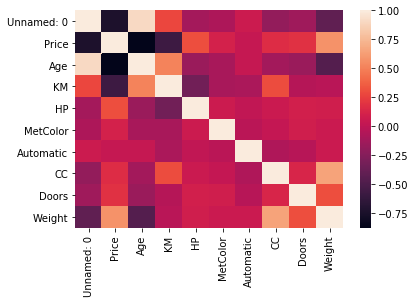

In [21]:
new_dataset = datasets.iloc[:, :]
corr = new_dataset.corr()
sns.heatmap(corr)

In [25]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

select_col = new_dataset.columns[columns-1]
select_col.shape
new_dataset = new_dataset[select_col]
print(new_dataset)

      Unnamed: 0  Unnamed: 0  Weight  Unnamed: 0  Unnamed: 0  Unnamed: 0  \
0              0           0    1165           0           0           0   
1              1           1    1165           1           1           1   
2              2           2    1165           2           2           2   
3              3           3    1165           3           3           3   
4              4           4    1170           4           4           4   
...          ...         ...     ...         ...         ...         ...   
1431        1431        1431    1025        1431        1431        1431   
1432        1432        1432    1015        1432        1432        1432   
1433        1433        1433    1015        1433        1433        1433   
1434        1434        1434    1015        1434        1434        1434   
1435        1435        1435    1114        1435        1435        1435   

      Unnamed: 0  Unnamed: 0  Unnamed: 0  Unnamed: 0  
0              0           0    